In [1]:
import numpy as np
import statsmodels.api as sm

np.random.seed(0)
n = 1000
x = np.random.normal(size=n)                 # single predictor
X = sm.add_constant(x)                       # adds intercept
beta = np.array([-0.2, 1.5])
latent = X.dot(beta) + np.random.normal(size=n)
y = (latent > 0).astype(int)                 # observed binary

model = sm.Probit(y, X)
res = model.fit(disp=False)                  # disp=False quiets output
print(res.summary())

# predicted probabilities
probs = res.predict(X)
# marginal effect at mean of X:
xb = X.mean(axis=0).dot(res.params)
phi_xb = (1/np.sqrt(2*np.pi))*np.exp(-xb**2/2)
marginal_effect_at_mean = phi_xb * res.params[1]
print("Marginal effect (at mean) for x:", marginal_effect_at_mean)

                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                         Probit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Mon, 29 Sep 2025   Pseudo R-squ.:                  0.4210
Time:                        17:26:49   Log-Likelihood:                -397.04
converged:                       True   LL-Null:                       -685.69
Covariance Type:            nonrobust   LLR p-value:                1.454e-127
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1924      0.051     -3.773      0.000      -0.292      -0.092
x1             1.4891      0.085     17.423      0.000       1.322       1.657
Marginal effect (at mean) for x: 0.5743658506475999


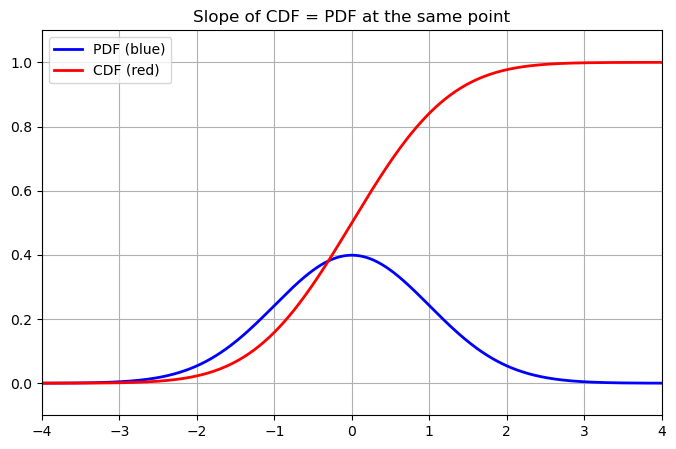

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.stats import norm

# Generate values
x = np.linspace(-4, 4, 500)
pdf = norm.pdf(x)       # Standard Normal PDF
cdf = norm.cdf(x)       # Standard Normal CDF

# Set up the figure
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, pdf, 'b-', lw=2, label="PDF (blue)")
ax.plot(x, cdf, 'r-', lw=2, label="CDF (red)")
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(-4, 4)
ax.set_title("Slope of CDF = PDF at the same point")
ax.legend()
ax.grid(True)

# Lines and points for animation
vline, = ax.plot([], [], 'g--')
tangent, = ax.plot([], [], 'k-', lw=1.5)
point_pdf, = ax.plot([], [], 'bo')
point_cdf, = ax.plot([], [], 'ro')

def init():
    vline.set_data([], [])
    tangent.set_data([], [])
    point_pdf.set_data([], [])
    point_cd_


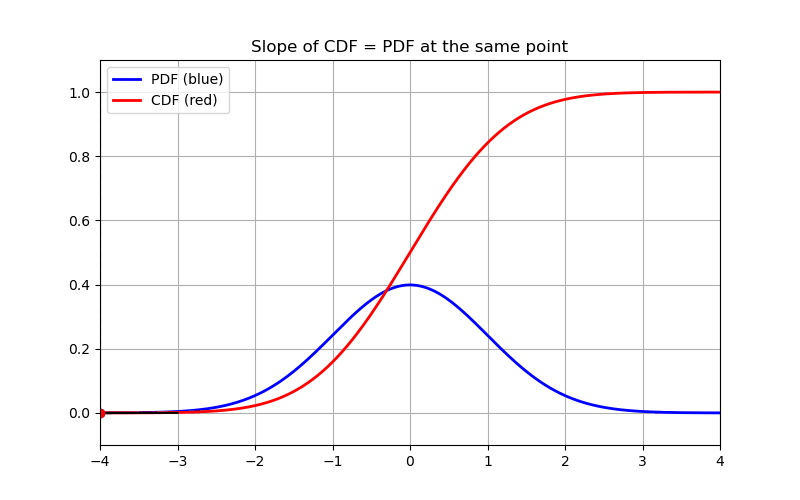

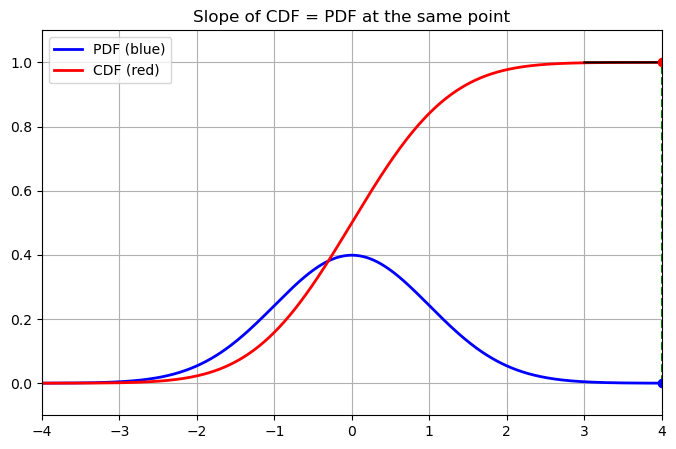

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.stats import norm
from IPython.display import Image

# Generate values
x = np.linspace(-4, 4, 500)
pdf = norm.pdf(x)       # Standard Normal PDF
cdf = norm.cdf(x)       # Standard Normal CDF

# Set up the figure
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, pdf, 'b-', lw=2, label="PDF (blue)")
ax.plot(x, cdf, 'r-', lw=2, label="CDF (red)")
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(-4, 4)
ax.set_title("Slope of CDF = PDF at the same point")
ax.legend()
ax.grid(True)

# Lines and points for animation
vline, = ax.plot([], [], 'g--')
tangent, = ax.plot([], [], 'k-', lw=1.5)
point_pdf, = ax.plot([], [], 'bo')
point_cdf, = ax.plot([], [], 'ro')

def init():
    vline.set_data([], [])
    tangent.set_data([], [])
    point_pdf.set_data([], [])
    point_cdf.set_data([], [])
    return vline, tangent, point_pdf, point_cdf

def update(frame):
    a = x[frame]
    slope = norm.pdf(a)                # derivative of CDF at a
    intercept = norm.cdf(a) - slope*a  # tangent line passes through (a, CDF(a))

    # Tangent line near 'a'
    tangent_x = np.linspace(a-1, a+1, 50)
    tangent_y = slope*tangent_x + intercept

    # Update vertical line
    vline.set_data([a, a], [0, 1])

    # Update tangent line
    tangent.set_data(tangent_x, tangent_y)

    # Update points (PDF and CDF values at a)
    point_pdf.set_data([a], [norm.pdf(a)])
    point_cdf.set_data([a], [norm.cdf(a)])

    return vline, tangent, point_pdf, point_cdf

# Create animation
ani = FuncAnimation(fig, update, frames=len(x), init_func=init,
                    blit=True, interval=50, repeat=True)

# Save animation as GIF
ani.save("cdf_pdf_slope.gif", writer=PillowWriter(fps=20))

# Show GIF inline (in Jupyter/Colab)
Image(filename="cdf_pdf_slope.gif")
